In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Sample Data_Internship.xlsx")
data

,WH Lat-Long,Customer Lat-Long
0,"19.062668,73.006408","19.047434347826,73.016971478261"
1,"19.062668,73.006408","19.047509002597,73.016033798701"
2,"19.062668,73.006408","19.047703529954,73.016599608295"
3,"19.062668,73.006408","19.048146502000,73.016119993333"
4,"19.062668,73.006408","19.048152971429,73.017662185714"
...,...,...
463,"19.062668,73.006408","19.064610098182,73.007222643182"
464,"19.062668,73.006408","19.064684396552,73.006964943966"
465,"19.062668,73.006408","19.064687730464,73.007236486093"
466,"19.062668,73.006408","19.064749378378,73.006939585586"


In [3]:
WH_lat,WH_lon = [],[]
for i in data["WH Lat-Long"]:
    lat,lon = i.split(",")
    WH_lat.append(float(lat))
    WH_lon.append(float(lon))
    
Cust_lat,Cust_lon = [],[]
for i in data["Customer Lat-Long"]:
    lat,lon = i.split(",")
    Cust_lat.append(float(lat))
    Cust_lon.append(float(lon))

In [4]:
data["WH_lat"],data["WH_lon"],data["Cust_lat"],data["Cust_lon"] = WH_lat, WH_lon, Cust_lat, Cust_lon


In [5]:
df = data.drop(["WH Lat-Long","Customer Lat-Long"],axis = 1)
df

,WH_lat,WH_lon,Cust_lat,Cust_lon
0,19.062668,73.006408,19.047434,73.016971
1,19.062668,73.006408,19.047509,73.016034
2,19.062668,73.006408,19.047704,73.016600
3,19.062668,73.006408,19.048147,73.016120
4,19.062668,73.006408,19.048153,73.017662
...,...,...,...,...
463,19.062668,73.006408,19.064610,73.007223
464,19.062668,73.006408,19.064684,73.006965
465,19.062668,73.006408,19.064688,73.007236
466,19.062668,73.006408,19.064749,73.006940


In [6]:
x = df.iloc[:,[2,3]].values
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
kmeans.fit(x)

KMeans(n_clusters=7, random_state=42)

In [7]:
deg = kmeans.inertia_ #avg dist. from centroid
dis = deg*110*1000    # 1 degree = 110km
dis    # less than 200m

180.61880240781755

In [8]:
y_kmeans = kmeans.fit_predict(x)

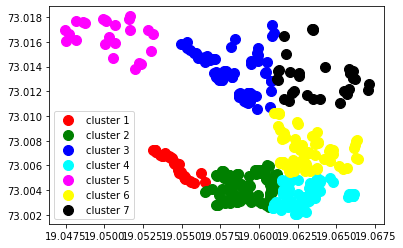

In [13]:
color = ['red','green','blue','cyan','magenta','yellow','black']
label = ['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6','cluster 7']

for i in range(7):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s = 100, c = color[i], label = label[i])
plt.legend()
plt.show()

In [11]:
start_coord = [df["WH_lat"][0]*110*1000, df["WH_lon"][0]*110*1000]
clusters = kmeans.cluster_centers_*110*1000
start_coord, clusters

([2096893.4799999997, 8030704.879999999],
 array([[2096006.98901767, 8030655.50705609],
        [2096514.68459617, 8030477.28777907],
        [2096413.24998902, 8031466.14956807],
        [2096924.35408059, 8030398.48668042],
        [2095542.0326384 , 8031814.57503861],
        [2096942.92132993, 8030781.00061015],
        [2097022.54245681, 8031453.098298  ]]))